In [1]:
import matplotlib.pyplot as plt
from ase.optimize.sciopt import *               
from ase.utils.geometry import *
from ase.lattice.spacegroup import crystal
from ase.visualize import *
from ase.lattice.surface import surface
from ase import Atoms
from ase import io
from ase.io.cif import read_cif
from ase.io.vasp import write_vasp
from abtem.visualize import show_atoms
from ase.visualize.plot import plot_atoms
from ase.build import add_adsorbate


/home/ahlawat/.local/lib/python3.9/site-packages/ase/utils/geometry.py:8: UserWarning: Moved to ase.geometry and ase.build
  warnings.warn('Moved to ase.geometry and ase.build')
/home/ahlawat/.local/lib/python3.9/site-packages/ase/lattice/spacegroup.py:5: UserWarning: Moved to ase.spacegroup
  warnings.warn('Moved to ase.spacegroup')
/home/ahlawat/.local/lib/python3.9/site-packages/ase/lattice/surface.py:17: UserWarning: Moved to ase.build
  warnings.warn('Moved to ase.build')


In [2]:
! rm *.vasp

rm: cannot remove '*.vasp': No such file or directory


# FAPbI3 structures are taken from: http://dx.doi.org/10.1021/ic401215x

### below FA are placed to rectify unit cells

## cubic 3R polymorph: https://dx.doi.org/10.5517/cc11hdwt
- Experimental data
 - Space group 	P 3 m 1 (156)
 - Unit cell 	a 8.9817(13)Å b 8.9817(13)Å c 11.006(2)Å
 - α 90.00° β 90.00° γ 120.00°
 - Cell volume 	768.91
 - Reduced cell 	a 8.982Å b 8.982Å c 11.006Å
 - α 90.000° β 90.000° γ 120.000°
 - Habit 	hexagonal plate
 - Polymorph 	alpha polymorph

/home/ahlawat/.local/lib/python3.9/site-packages/ase/io/cif.py:401: UserWarning: crystal system 'Trigonal' is not interpreted for space group Spacegroup(156, setting=1). This may result in wrong setting!
  warnings.warn(


Text(0, 0.5, 'y[$\\AA$]')

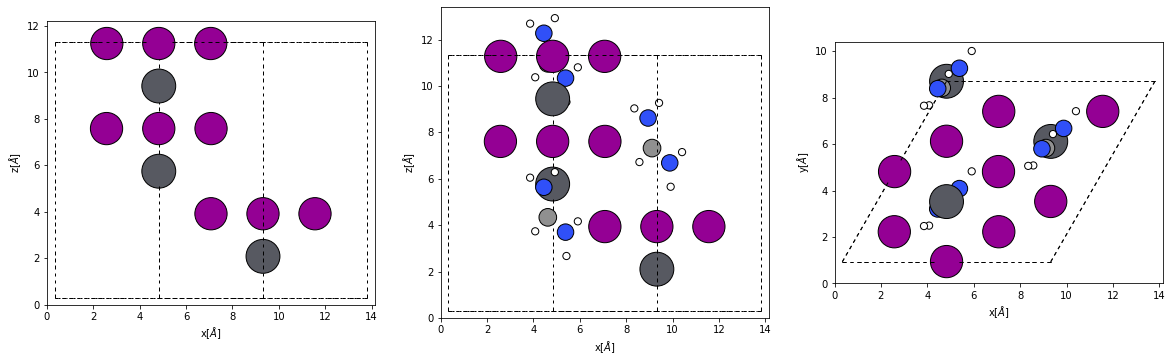

In [3]:
structure = io.read('cubic_3R.cif')
structure = sort(structure)
tmp_molecule=[]
j = 0
num_atoms = len(structure.get_chemical_symbols())
i = 0
del_index = []
N_index = []
flag = False

while i < num_atoms:
    if(structure.get_chemical_symbols()[i] == 'C'):
        del_index.append(i)
        molecule = io.read('FA.pdb')
        molecule.set_cell(structure.cell)
        xmin = molecule.get_center_of_mass()[0]
        xmax = structure.positions[i, 0]
        ymin = molecule.get_center_of_mass()[1]
        ymax = structure.positions[i, 1]
        zmin = molecule.get_center_of_mass()[2]
        zmax = structure.positions[i, 2]
        molecule.positions += (xmax - xmin, ymax - ymin, zmax - zmin)   
        if j==0:
            tmp_molecule = molecule 
        else:
            tmp_molecule += molecule
        j = j+1
    i = i + 1
    
k = 0
while k < num_atoms:
    if(structure.get_chemical_symbols()[k] == 'N'):
        del_index.append(k)
    k = k + 1

del structure[del_index]  


FA_replaced_structure = structure + tmp_molecule
FA_replaced_structure = sort(FA_replaced_structure)

view (FA_replaced_structure)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

plot_atoms(structure, ax1, radii=0.5, rotation=('90x,0y,0z'))
#ax1.set_xlim(-20, 30)
ax1.set_xlabel(r'x[$\AA$]')
ax1.set_ylabel(r'z[$\AA$]')

plot_atoms(FA_replaced_structure, ax2, radii=0.5, rotation=('90x,0y,0z'))
#ax2.set_xlim(-20, 30)
ax2.set_xlabel(r'x[$\AA$]')
ax2.set_ylabel(r'z[$\AA$]')

plot_atoms(FA_replaced_structure, ax3, radii=0.5, rotation=('180x,0y,0z'))
#ax3.set_xlim(-20, 30)
ax3.set_xlabel(r'x[$\AA$]')
ax3.set_ylabel(r'y[$\AA$]')

#fig.savefig("ase_slab.png")

#view(structure)


### prepare vasp/quantum espresso input file

In [4]:
write_vasp('cubic_3R.vasp', FA_replaced_structure, vasp5=True, direct=True)

# inp_data={'prefix':"cubic",
#           'electron_maxstep':1000,
#           'outdir':"./",    
#           'pseudo_dir':"/work/e89/e89/ahlawat/PP/",
#           'calculation':'vc-relax',
#           'vdw_corr':'grimme-d3',
#           'ecutwfc':80.,
#           'occupations':'fixed',
#           'ecutrho':560.,   
#           'conv_thr':1e-8,
#           'electron_maxstep':500,
#           'ion_dynamics':'bfgs',
#           'cell_dynamics':'bfgs'}

# pseudos={"C":"C.pbe-n-rrkjus_psl.1.0.0.UPF", 
#          "H":"H.pbe-rrkjus_psl.1.0.0.UPF", 
#          "I":"I.pbe-n-rrkjus_psl.0.2.UPF", 
#          "N":"N.pbe-n-rrkjus_psl.1.0.0.UPF",
#          "Pb":"Pb.pbe-dn-rrkjus_psl.0.2.2.UPF"}

# io.write("Sn_cubic.pwi", 
#          new_slab, 
#          input_data=inp_data,
#          pseudopotentials=pseudos, 
#          kpts=(1, 2, 3),
#          koffset=(0, 0, 0), 
#          crystal_coordinates=False)



## tetragonal polymorph:https://dx.doi.org/10.5517/cc11hdrp
- Experimental data
  - Formula 	(I36 Pb12 12-)n,12n(C H5 N2 +)
  - Crystal details
  - Space group 	P 3 (143)
  - Unit cell 	a 17.7914(8)Å b 17.7914(8)Å c 10.9016(6)Å
  - α 90.00° β 90.00° γ 120.00°
  - Cell volume 	2988.42
  - Reduced cell 	a 10.902Å b 17.791Å c 17.791Å
  - α 120.000° β 90.000° γ 90.000°
  - Habit 	hexagonal plate
  - Polymorph 	beta polymorph

In [11]:
structure = io.read('beta.cif')
structure = sort(structure)
view (structure)

<Popen: returncode: None args: ['/home/ahlawat/miniconda3/bin/python', '-m',...>

Text(0, 0.5, 'y[$\\AA$]')

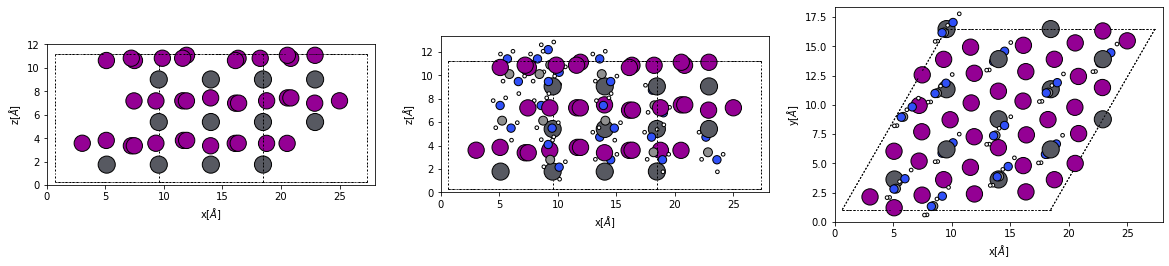

In [6]:
structure = io.read('beta.cif')
structure = sort(structure)
tmp_molecule=[]
j = 0
num_atoms = len(structure.get_chemical_symbols())
i = 0
del_index = []
N_index = []
flag = False

while i < num_atoms:
    if(structure.get_chemical_symbols()[i] == 'C'):
        del_index.append(i)
        molecule = io.read('FA.pdb')
        molecule.set_cell(structure.cell)
        xmin = molecule.get_center_of_mass()[0]
        xmax = structure.positions[i, 0]
        ymin = molecule.get_center_of_mass()[1]
        ymax = structure.positions[i, 1]
        zmin = molecule.get_center_of_mass()[2]
        zmax = structure.positions[i, 2]
        molecule.positions += (xmax - xmin, ymax - ymin, zmax - zmin)   
        if j==0:
            tmp_molecule = molecule 
        else:
            tmp_molecule += molecule
        j = j+1
    i = i + 1
    
k = 0
while k < num_atoms:
    if(structure.get_chemical_symbols()[k] == 'N'):
        del_index.append(k)
    k = k + 1

del structure[del_index]  


FA_replaced_structure = structure + tmp_molecule
FA_replaced_structure = sort(FA_replaced_structure)

view (FA_replaced_structure)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

plot_atoms(structure, ax1, radii=0.5, rotation=('90x,0y,0z'))
#ax1.set_xlim(-20, 30)
ax1.set_xlabel(r'x[$\AA$]')
ax1.set_ylabel(r'z[$\AA$]')

plot_atoms(FA_replaced_structure, ax2, radii=0.5, rotation=('90x,0y,0z'))
#ax2.set_xlim(-20, 30)
ax2.set_xlabel(r'x[$\AA$]')
ax2.set_ylabel(r'z[$\AA$]')

plot_atoms(FA_replaced_structure, ax3, radii=0.5, rotation=('180x,0y,0z'))
#ax3.set_xlim(-20, 30)
ax3.set_xlabel(r'x[$\AA$]')
ax3.set_ylabel(r'y[$\AA$]')

#fig.savefig("ase_slab.png")

#view(structure)

### prepare vasp/quantum espresso input file

In [7]:
write_vasp('beta.vasp', FA_replaced_structure, vasp5=True, direct=True)

## hexagonal polymorph: https://dx.doi.org/10.5517/cc11hdjg
- Experimental data
    - Formula 	(I3 Pb -)n,n(C H5 N2 +)
    - Crystal details
    - Space group 	P 63 m c (186)
    - Unit cell 	a 8.6603(14)Å b 8.6603(14)Å c 7.9022(6)Å
    - α 90.00° β 90.00° γ 120.00°
    - Cell volume 	513.27
    - Reduced cell 	a 7.902Å b 8.660Å c 8.660Å
    - α 120.000° β 90.000° γ 90.000°
    - Polymorph 	delta polymorph
    - Colour 	yellow

/home/ahlawat/.local/lib/python3.9/site-packages/ase/io/cif.py:401: UserWarning: crystal system 'Hexagonal' is not interpreted for space group Spacegroup(186, setting=1). This may result in wrong setting!
  warnings.warn(


Text(0, 0.5, 'y[$\\AA$]')

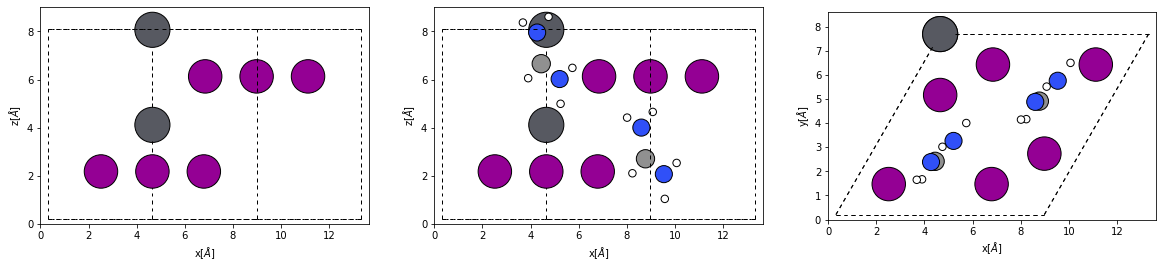

In [8]:
structure = io.read('hexagonal_phase.cif')
structure = sort(structure)
tmp_molecule=[]
j = 0
num_atoms = len(structure.get_chemical_symbols())
i = 0
del_index = []
N_index = []
flag = False

while i < num_atoms:
    if(structure.get_chemical_symbols()[i] == 'C'):
        del_index.append(i)
        molecule = io.read('FA.pdb')
        molecule.set_cell(structure.cell)
        xmin = molecule.get_center_of_mass()[0]
        xmax = structure.positions[i, 0]
        ymin = molecule.get_center_of_mass()[1]
        ymax = structure.positions[i, 1]
        zmin = molecule.get_center_of_mass()[2]
        zmax = structure.positions[i, 2]
        molecule.positions += (xmax - xmin, ymax - ymin, zmax - zmin)   
        if j==0:
            tmp_molecule = molecule 
        else:
            tmp_molecule += molecule
        j = j+1
    i = i + 1
    
k = 0
while k < num_atoms:
    if(structure.get_chemical_symbols()[k] == 'N'):
        del_index.append(k)
    k = k + 1

del structure[del_index]  


FA_replaced_structure = structure + tmp_molecule
FA_replaced_structure = sort(FA_replaced_structure)

view (FA_replaced_structure)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

plot_atoms(structure, ax1, radii=0.5, rotation=('90x,0y,0z'))
#ax1.set_xlim(-20, 30)
ax1.set_xlabel(r'x[$\AA$]')
ax1.set_ylabel(r'z[$\AA$]')

plot_atoms(FA_replaced_structure, ax2, radii=0.5, rotation=('90x,0y,0z'))
#ax2.set_xlim(-20, 30)
ax2.set_xlabel(r'x[$\AA$]')
ax2.set_ylabel(r'z[$\AA$]')

plot_atoms(FA_replaced_structure, ax3, radii=0.5, rotation=('180x,0y,0z'))
#ax3.set_xlim(-20, 30)
ax3.set_xlabel(r'x[$\AA$]')
ax3.set_ylabel(r'y[$\AA$]')

#fig.savefig("ase_slab.png")

#view(structure)

In [9]:
write_vasp('hexagonal.vasp', FA_replaced_structure, vasp5=True, direct=True)